#MSc Project
**Title :** Pattern Recognition Approaches for Identifying and predicting Stock Market next-day Returns, Close price and Up/Down <br>

**Name:** Deboky Saha <br>
**Student ID:** 001142694 <br>
**Supervisor:** Georgios Samakovitis <br>
**Second Marker:** Christopher Walshaw


**This part of the code is for the implementation of one stock data after part-1**


In [ ]:
# Dataframe library
import pandas as pd

# Linear Algebra library
import numpy as np
import scipy

#Visualisation library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Pre-prpcessing Library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning Model Library
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Deep Learning Model Library
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
import math


#Importing the CSV file created in part-1

In [ ]:
Data_AZN = pd.read_csv('/content/drive/MyDrive/AZN_Stocks_Filled_Updated.csv')

In [ ]:
Data_AZN

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Daily_returns,100_SMA,100_EMA,100_ATR,MACD,Upper Bollinger Bands,Middle Bollinger Bands,Lower Bollinger Bands,Parabolic Stop & Reverse,ADX,CCI,ROC,RSI,Stochastic K,Stochastic D,William %R,VWAP,OBV,CMF,A/D,Output_NextClose,Output_NextReturns,Output_Up_Down
0,0,23.219999,23.389999,23.160000,23.180000,14.474536,1428800.0,0.002159,23.646179,23.688561,0.475778,0.000000,24.630437,23.928214,23.225991,23.315685,22.705671,-128.824373,2.535492,60.879096,39.674641,48.065027,-77.899976,23.243333,1428800.0,-0.826086,-1.180312e+06,23.473571,0.001513,0.0
1,1,23.400000,23.469999,23.325001,23.410000,14.618157,1922400.0,0.009922,23.646179,23.688561,0.475778,0.018348,24.630437,23.928214,23.225991,23.160000,22.705671,-128.824373,2.535492,60.879096,39.674641,48.065027,-77.899976,23.401667,3351200.0,-0.253300,-8.488591e+05,23.180000,0.001513,1.0
2,2,23.295000,23.650000,23.270000,23.639999,14.761774,4217600.0,0.009825,23.646179,23.688561,0.475778,0.050861,24.630437,23.928214,23.225991,23.166200,22.705671,-128.824373,2.535492,63.024127,39.674641,48.065027,-77.899976,23.520000,7568800.0,0.415751,3.146740e+06,23.410000,0.009922,1.0
3,3,23.605000,23.660000,23.495001,23.620001,14.749290,2976800.0,-0.000846,23.646179,23.688561,0.475778,0.074159,24.630437,23.928214,23.225991,23.185552,22.705671,-128.824373,2.535492,60.879096,39.674641,48.065027,-77.899976,23.591667,4592000.0,0.443813,4.680270e+06,23.639999,0.009825,0.0
4,4,23.469999,23.500000,23.315001,23.475000,14.658748,2918600.0,-0.006139,23.646179,23.688561,0.475778,0.080001,24.630437,23.928214,23.225991,23.214019,22.271356,-128.824373,2.535492,60.879096,39.674641,48.065027,-77.899976,23.430000,1673400.0,0.505790,6.810055e+06,23.620001,-0.000846,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2512,48.900002,48.900002,48.169998,48.520000,47.599960,4931700.0,-0.005126,54.079400,53.258180,1.164500,-1.344681,55.971941,51.905500,47.839059,53.662999,20.881633,-229.972619,-9.426918,31.208822,21.759829,32.604596,-97.912928,48.530000,196076200.0,-0.162843,4.002690e+08,48.770000,0.000821,0.0
2513,2513,50.230000,50.279999,49.139999,49.380001,48.443653,15481900.0,0.017725,54.013700,53.181384,1.174600,-1.333118,55.940186,51.744000,47.547814,53.223559,20.793444,-179.500475,-6.121668,37.231995,20.449184,31.856171,-92.784718,49.600000,211558100.0,-0.182046,3.913059e+08,48.520000,-0.005126,1.0
2514,2514,50.660000,50.700001,49.790001,49.900002,48.953793,17308500.0,0.010531,53.950600,53.116406,1.180600,-1.267384,55.823967,51.592000,47.360034,52.819274,20.341035,-153.269096,-5.151110,40.617629,19.123085,31.074660,-89.683938,50.130001,228866600.0,-0.264190,3.781819e+08,49.380001,0.017725,1.0
2515,2515,50.459999,50.549999,50.040001,50.180000,49.228481,14349100.0,0.005611,53.898300,53.058260,1.174700,-1.179105,55.676285,51.452000,47.227715,52.447332,19.920941,-143.564429,-5.213447,42.418651,18.092466,30.279022,-88.014302,50.256667,243215700.0,-0.282824,3.717107e+08,49.900002,0.010531,1.0


#Data Pre-processing

In [ ]:
#Standardasation

scaler = StandardScaler()
Data_Std = scaler.fit_transform(Data_AZN)

In [ ]:
Data_Std

array([[-1.7313628 , -1.15010792, -1.14668685, ..., -1.12566591,
         0.0607229 , -1.02616663],
       [-1.72998652, -1.12974712, -1.13771961, ..., -1.15900323,
         0.0607229 ,  0.97450061],
       [-1.72861024, -1.14162419, -1.11754321, ..., -1.13288494,
         0.62024887,  0.97450061],
       ...,
       [ 1.72861024,  1.95376453,  1.91450503, ...,  1.81621065,
         1.1394167 ,  0.97450061],
       [ 1.72998652,  1.93114145,  1.89769123, ...,  1.87526081,
         0.66072275,  0.97450061],
       [ 1.7313628 ,  1.87910871,  1.84612971, ...,  1.90705676,
         0.33338457, -1.02616663]])

In [ ]:
#Creating PCA Model
pca = PCA()
pca.fit(Data_Std)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([5.44864145e-01, 1.51910944e-01, 7.27170048e-02, 5.37891399e-02,
       3.77465025e-02, 3.27866148e-02, 2.69152895e-02, 2.29691296e-02,
       1.66092068e-02, 1.11687039e-02, 6.53662747e-03, 5.24236112e-03,
       5.03052421e-03, 3.49387596e-03, 2.73337953e-03, 2.58107263e-03,
       1.15134190e-03, 5.95533780e-04, 4.39139178e-04, 3.06301645e-04,
       1.61122451e-04, 1.14308430e-04, 8.27253489e-05, 2.12649011e-05,
       1.35752502e-05, 1.00036683e-05, 7.15139641e-06, 3.01102016e-06,
       3.62181473e-32, 6.25699254e-33])

**Visualising Explained Variance by Components by PCA**

Text(0, 0.5, 'Cumulative Explained Variance')

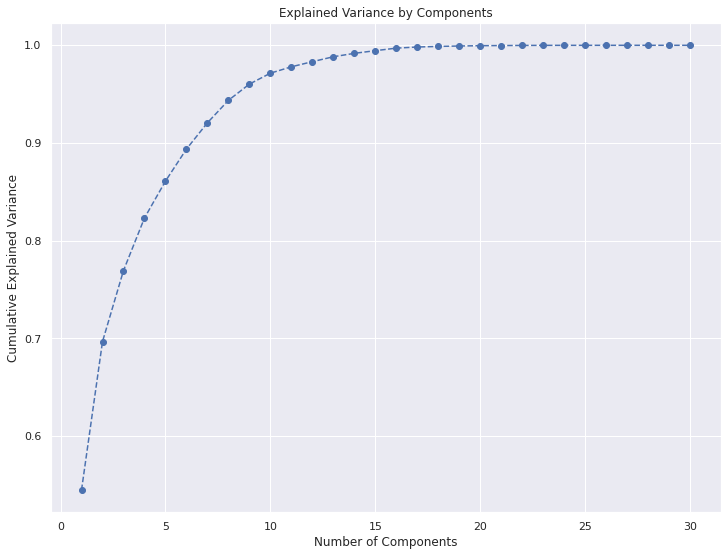

In [ ]:
plt.figure(figsize = (12,9))
plt.plot(range(1,31), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# Keep 80 percent of the explained variance

In [ ]:
# Taking only 10 components 
pca = PCA(n_components = 10)

In [ ]:
# Fitting the PCA models with 10 features to the data
pca.fit(Data_Std)

PCA(n_components=10)

In [ ]:
pca.components_

array([[ 2.20210675e-01,  2.46262591e-01,  2.46316836e-01,
         2.46230890e-01,  2.46286117e-01,  2.45645799e-01,
         4.83013484e-02,  2.25202488e-03,  2.39251438e-01,
         2.41484366e-01,  2.04967788e-01,  5.45850896e-02,
         2.44705402e-01,  2.45209164e-01,  2.42906897e-01,
         2.42591777e-01,  1.85722229e-02,  5.56555236e-02,
         3.20014304e-02,  2.34810620e-02,  8.73076083e-02,
         8.85278696e-02,  7.47202777e-02,  2.46317766e-01,
         2.33583117e-01, -5.71729521e-02,  2.06466802e-01,
         2.46173672e-01,  4.00920682e-03,  2.07219739e-03],
       [ 3.64986815e-02, -6.65746519e-04, -6.82147382e-04,
        -4.02237401e-03, -3.56679900e-03,  9.39664477e-03,
         1.72024636e-02, -1.22728075e-01,  9.88624713e-02,
         8.87793333e-02,  1.15815233e-01, -3.91470448e-01,
         4.33068366e-02,  4.55709920e-02,  4.75833051e-02,
         4.59051297e-02, -1.48011057e-01, -4.22101732e-01,
        -3.87978767e-01, -4.11163118e-01, -2.13312181e-

**Creating a DataFrame with 10 components**

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = Data_AZN.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6','Component 7','Component 8','Component 9','Component 10'])
df_pca_comp

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Daily_returns,100_SMA,100_EMA,100_ATR,MACD,Upper Bollinger Bands,Middle Bollinger Bands,Lower Bollinger Bands,Parabolic Stop & Reverse,ADX,CCI,ROC,RSI,Stochastic K,Stochastic D,William %R,VWAP,OBV,CMF,A/D,Output_NextClose,Output_NextReturns,Output_Up_Down
Component 1,0.220211,0.246263,0.246317,0.246231,0.246286,0.245646,0.048301,0.002252,0.239251,0.241484,0.204968,0.054585,0.244705,0.245209,0.242907,0.242592,0.018572,0.055656,0.032001,0.023481,0.087308,0.088528,0.074720,0.246318,0.233583,-0.057173,0.206467,0.246174,0.004009,0.002072
Component 2,0.036499,-0.000666,-0.000682,-0.004022,-0.003567,0.009397,0.017202,-0.122728,0.098862,0.088779,0.115815,-0.391470,0.043307,0.045571,0.047583,0.045905,-0.148011,-0.422102,-0.387979,-0.411163,-0.213312,-0.090151,-0.393844,-0.002745,0.001539,-0.200125,-0.037544,0.003921,-0.103583,-0.099666
Component 3,-0.014167,-0.030408,-0.034325,-0.032704,-0.036693,-0.030564,-0.038727,-0.234955,-0.060816,-0.046522,-0.166347,-0.095700,-0.014826,0.001087,0.018964,0.009083,0.052876,0.102953,-0.250086,-0.223015,0.524070,0.551114,0.234913,-0.034585,-0.052079,-0.252802,0.071593,-0.022626,-0.088369,-0.231925
Component 4,-0.007120,0.012628,0.007237,0.005976,0.000013,-0.001988,0.094868,-0.633948,-0.005379,-0.005445,0.039931,0.207347,0.006833,-0.000576,-0.008899,0.010923,0.060846,0.018821,0.139625,0.005902,-0.106387,-0.183979,-0.059026,0.004416,0.001931,0.167499,-0.020082,0.038539,0.205253,-0.632125
Component 5,0.052097,-0.020791,-0.015637,-0.027927,-0.022005,-0.007469,0.710783,0.037770,-0.018626,-0.022235,0.019785,0.007969,0.019693,-0.017927,-0.060011,-0.004276,0.651595,-0.028397,0.010717,-0.031429,-0.027192,0.014882,-0.110930,-0.021813,-0.062872,-0.127046,0.076079,-0.023143,-0.103115,0.075819
Component 6,-0.017104,0.005799,0.007654,0.004563,0.004110,-0.004165,0.175894,0.032155,0.008237,0.003827,0.006441,-0.185450,-0.015238,-0.016719,-0.018189,-0.048769,-0.105237,0.024663,-0.061246,0.091451,-0.021291,0.091639,0.020355,0.005455,-0.010326,-0.274127,-0.028079,0.003015,0.899609,0.106832
Component 7,-0.246883,0.027290,0.030564,0.019806,0.023687,-0.052687,0.555268,-0.005629,-0.019006,-0.012601,0.127783,0.154006,0.005321,0.012650,0.020740,0.016380,-0.610136,0.089790,0.117951,0.009923,0.047094,0.029307,0.056633,0.024731,0.019389,-0.209724,-0.296459,0.024496,-0.222443,-0.016408
Component 8,-0.235023,0.046268,0.037786,0.047284,0.038555,-0.034766,-0.359391,-0.042107,-0.007143,-0.005735,0.124970,0.232764,0.022574,0.020234,0.017366,0.043241,0.297307,0.026755,0.115786,0.053404,-0.072051,-0.125662,-0.050416,0.041180,-0.039294,-0.701910,-0.320092,0.040377,-0.058595,-0.005387
Component 9,-0.447675,0.045128,0.048831,0.042472,0.047520,-0.067925,-0.038909,-0.003223,0.018560,0.022369,0.311205,-0.036749,0.085442,0.072374,0.056835,0.101370,0.230086,-0.162673,-0.083421,-0.065601,0.168545,0.226779,-0.028038,0.046305,0.010613,0.471046,-0.484871,0.048347,0.126657,0.104738
Component 10,0.046884,-0.010686,-0.016972,-0.011800,-0.021255,-0.008360,-0.005395,-0.661448,-0.017128,-0.011399,-0.089905,0.161869,0.000025,0.008463,0.017850,0.030399,-0.048595,-0.018634,-0.029151,-0.080346,0.044597,-0.058906,-0.024328,-0.016696,0.031742,0.011589,0.047450,0.020744,-0.007891,0.709186


**Plotting HeatMap to view the correlation**

[Text(0, 0.5, 'PCA1'),
 Text(0, 1.5, 'PCA2'),
 Text(0, 2.5, 'PCA3'),
 Text(0, 3.5, 'PCA4'),
 Text(0, 4.5, 'PCA5'),
 Text(0, 5.5, 'PCA6'),
 Text(0, 6.5, 'PCA7'),
 Text(0, 7.5, 'PCA8'),
 Text(0, 8.5, 'PCA9'),
 Text(0, 9.5, 'PCA10')]

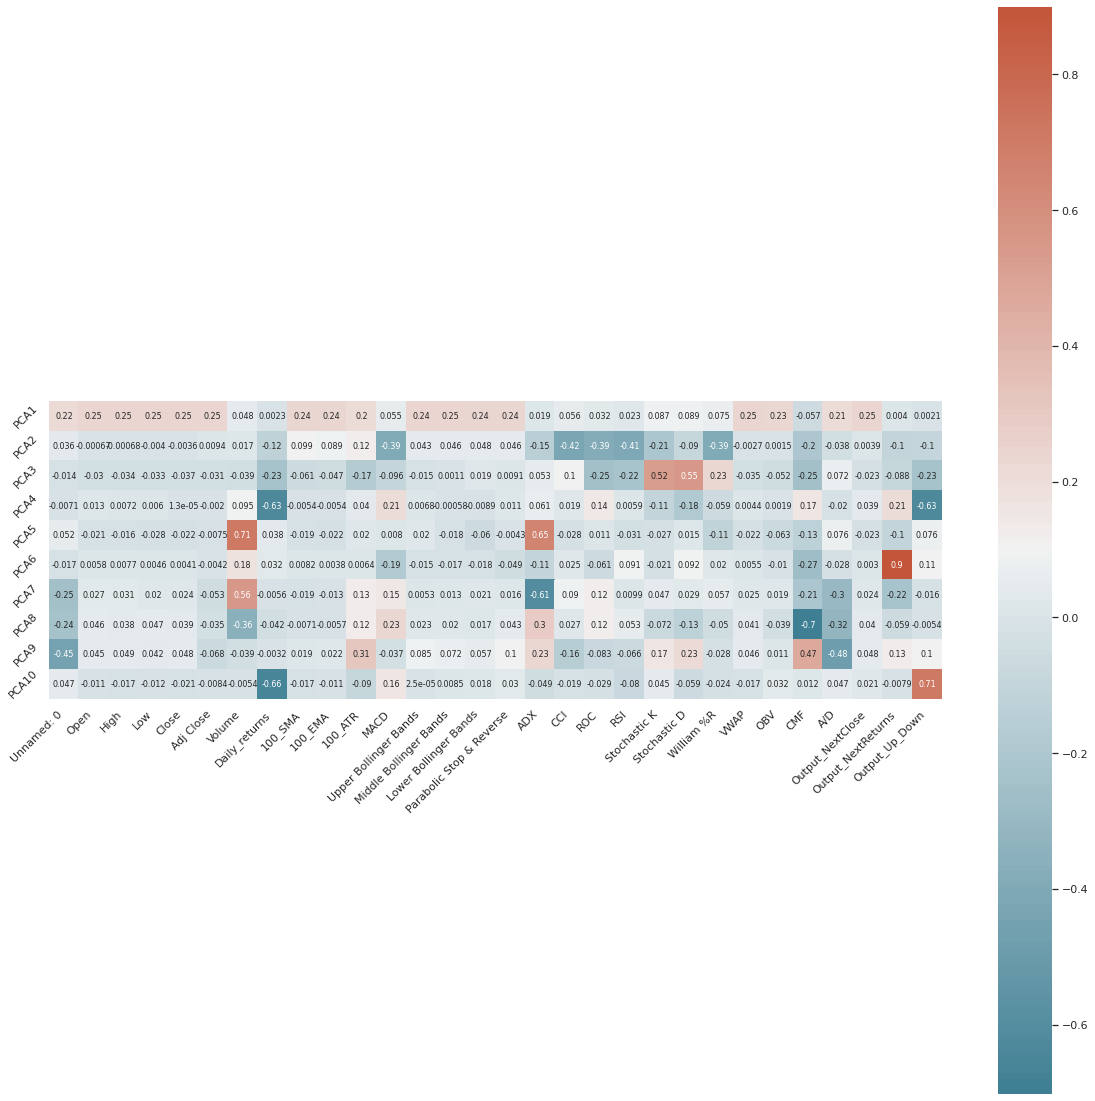

In [ ]:
plt.figure(figsize=(20, 20))

ax = sns.heatmap(df_pca_comp,
                 yticklabels=[ "PCA"+str(x) for x in range(1,11)],
                 xticklabels=list(Data_AZN.columns),
                 cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_aspect("equal")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')


In [ ]:
#Transforming the datset
PCA_Score =  pca.transform(Data_Std)

In [ ]:
# Calculating the next-day returns
y_Output_NextReturns = Data_AZN['Output_NextReturns']


In [ ]:

X_Train_NextReturns, X_Val_NextReturns, y_Train_Output_NextReturns, y_Val_Output_NextReturns = train_test_split(PCA_Score,y_Output_NextReturns,test_size = 0.20, shuffle=False)
# y_Output_NextReturns is for regression problem

#SVR

In [ ]:
# Creating the model
Model_SVM_Regression = SVR(kernel='linear')

Model_SVM_Regression.fit(X_Train_NextReturns, y_Train_Output_NextReturns)

# Predicting the model
SVR_predict = Model_SVM_Regression.predict(X_Val_NextReturns)

In [ ]:
# Evaluating the performance of SVR model

mse_SVR = mean_squared_error(y_Val_Output_NextReturns, SVR_predict)
print(f'MSE of SVR: {mse_SVR}.')

rmse_SVR = math.sqrt(mean_squared_error(y_Val_Output_NextReturns, SVR_predict))
print(f'RMSE of SVR: {rmse_SVR}.')

r2_SVR = r2_score(y_Val_Output_NextReturns, SVR_predict)
print(f'R2 of SVR: {r2_SVR}.')

MSE of SVR: 0.0003688151919806947.
RMSE of SVR: 0.019204561749248398.
R2 of SVR: -0.034524843945849426.


#RF Regressor 

In [ ]:
# Creating the model
RF_Regressor = RandomForestRegressor(n_estimators = 1000, random_state = False)
RF_Regressor.fit(X_Train_NextReturns, y_Train_Output_NextReturns)

# Predicting the model
RF_Regressor_predict = RF_Regressor.predict(X_Val_NextReturns)



In [ ]:
# Evaluating the performance of the RF regressor model
mse_RF = mean_squared_error(y_Val_Output_NextReturns, RF_Regressor_predict)
print(f'MSE of RF: {mse_RF}.')

rmse_RF = math.sqrt(mean_squared_error(y_Val_Output_NextReturns, RF_Regressor_predict))
print(f'RMSE of RF: {rmse_RF}.')

r2_RF = r2_score(y_Val_Output_NextReturns, RF_Regressor_predict)
print(f'R2 of RF: {r2_RF}.')

MSE of RF: 2.825437885893657e-05.
RMSE of RF: 0.005315484818804073.
R2 of RF: 0.9207466028640212.


# MUltivariant LSTM Model

In [ ]:
# Reshaping the size of the input to feed into the network

X_Train_reshape = X_Train_NextReturns.reshape(-1, 1, 10) # 10 input features  which  is the result of PCA 
X_Val_reshape  = X_Val_NextReturns.reshape(-1, 1, 10) # 10 input features  which  is the result of PCA
y_Train_reshape = y_Train_Output_NextReturns.values.reshape(-1, 1, 1) # The output has one value
y_Val_reshape = y_Val_Output_NextReturns.values.reshape(-1, 1, 1) # The output has one value


Model_LSTM = Sequential()  
# First LSTM Layer with Dropout regularisation
Model_LSTM.add(LSTM(units = 70,input_shape=(1,10), activation='relu',return_sequences=True))
Model_LSTM.add(Dropout(0.2))
# Second LSTM Layer 
Model_LSTM.add(LSTM(units = 70,return_sequences=True))
Model_LSTM.add(Dropout(0.2))
# Third LSTM Layer 
Model_LSTM.add(LSTM(units = 70,return_sequences=True))
Model_LSTM.add(Dropout(0.2))
# Fourth LSTM Layer  
Model_LSTM.add(LSTM(units = 70))
Model_LSTM.add(Dropout(0.2))
# The Output Layer as it has 1 output (Next Returns)
Model_LSTM.add(Dense(units=1))

# Compiling the RNN
Model_LSTM.compile(optimizers.Adam(learning_rate=0.01),loss='mean_squared_error')

# Fitting to the training set

History_LSTM = Model_LSTM.fit(X_Train_reshape,y_Train_reshape,validation_data=(X_Val_reshape,y_Val_reshape),epochs=100,batch_size=64,verbose=1)

# Takes 46s to execute this cell in Colab Pro



Epoch 1/100
32/32 [==============================] - 12s 67ms/step - loss: 2.3647e-04 - val_loss: 8.0144e-05
Epoch 2/100
32/32 [==============================] - 0s 14ms/step - loss: 3.2570e-05 - val_loss: 1.9335e-05
Epoch 3/100
32/32 [==============================] - 0s 14ms/step - loss: 2.1388e-05 - val_loss: 3.0980e-05
Epoch 4/100
32/32 [==============================] - 1s 16ms/step - loss: 2.6277e-05 - val_loss: 1.3686e-05
Epoch 5/100
32/32 [==============================] - 0s 14ms/step - loss: 1.6353e-05 - val_loss: 3.7480e-05
Epoch 6/100
32/32 [==============================] - 0s 14ms/step - loss: 1.5684e-05 - val_loss: 1.2075e-05
Epoch 7/100
32/32 [==============================] - 0s 14ms/step - loss: 2.0250e-05 - val_loss: 6.9929e-05
Epoch 8/100
32/32 [==============================] - 0s 14ms/step - loss: 1.6580e-05 - val_loss: 2.1616e-05
Epoch 9/100
32/32 [==============================] - 0s 15ms/step - loss: 3.5372e-05 - val_loss: 2.0420e-05
Epoch 10/100
32/32 [=======

In [ ]:
Model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 70)             22680     
                                                                 
 dropout (Dropout)           (None, 1, 70)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 70)             39480     
                                                                 
 dropout_1 (Dropout)         (None, 1, 70)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 70)             39480     
                                                                 
 dropout_2 (Dropout)         (None, 1, 70)             0         
                                                                 
 lstm_3 (LSTM)               (None, 70)                3

**Predicting the performance in train and test dataset**

In [ ]:
train_predict = Model_LSTM.predict(X_Train_reshape)
test_predict = Model_LSTM.predict(X_Val_reshape)

In [ ]:
train_predict.shape

(2013, 1)

In [ ]:
test_predict.shape

(504, 1)

In [ ]:
y_Val_Output_NextReturns.shape

(504,)

In [ ]:
### Calculate RMSE performance metrics

rmse_LSTM = math.sqrt(mean_squared_error(y_Val_Output_NextReturns,test_predict))
print(f'RMSE of LSTM: {rmse_LSTM}.')

mse_LSTM = mean_squared_error(y_Val_Output_NextReturns, test_predict)
print(f'MSE of LSTM: {mse_LSTM}.')

r2_LSTM = r2_score(y_Val_Output_NextReturns, test_predict)
print(f'R2 of LSTM: {r2_LSTM}.')


RMSE of LSTM: 0.00429709790502997.
MSE of LSTM: 1.8465050405412954e-05.
R2 of LSTM: 0.9482056222073629.


**Plotting the validation Curve**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


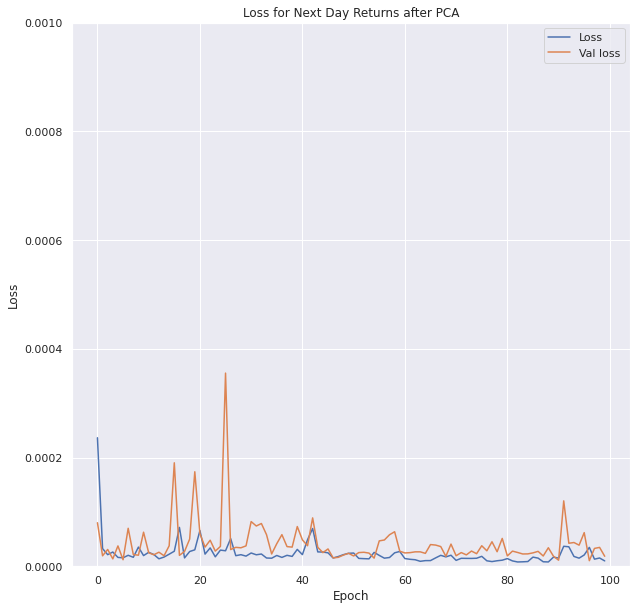

In [ ]:
# Validation
plt.figure(figsize=(10, 10))
plt.plot(History_LSTM.history['loss'], label='Loss')
plt.plot(History_LSTM.history['val_loss'], label = 'Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for Next Day Returns after PCA')
plt.ylim([0, 0.001])
plt.legend(loc='Upper right')

#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = Model_SVM_Regression,
                           param_grid = parameters,
                           scoring='r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_Train_NextReturns, y_Train_Output_NextReturns)

In [ ]:
score = grid_search.best_score_


In [ ]:
score

-1.0160993024593303

#End of Part-2